# 📊 Statistical Analysis on Medical Insurance Dataset

## 📝 Introduction

This project aims to perform **descriptive and inferential statistical analysis** on the Medical Insurance Cost dataset. The dataset contains information about individuals, including their age, BMI, number of children, smoking status, and medical charges incurred.

Using this dataset, we will explore:

- Measures of **central tendency** (mean, median, mode)
- Measures of **dispersion** (standard deviation, range, IQR)
- **Outlier detection** using boxplots and Z-scores
- **Skewness** and **kurtosis**
- **Correlation** and **covariance**
- **Hypothesis Testing** (e.g., Are medical charges significantly higher for smokers?)

The purpose is to derive **insights** using core statistical techniques that are commonly applied in real-world data science problems.

---

## 📁 Dataset Source

- **Kaggle Link**: [Medical Cost Personal Dataset](https://www.kaggle.com/datasets/mirichoi0218/insurance)

---


Measures of central tendency (mean, median, mode)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st


In [3]:
dataset=pd.read_csv(r"C:\Users\ROYAL ENFIELD\Downloads\insurance.csv")

In [4]:
dataset.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


In [4]:
dataset.isnull().sum() # No Null Values Present!

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
mn=np.mean(dataset["charges"])
md=np.median(dataset["charges"])
mo=dataset["charges"].mode()[0]

In [6]:
mn, md,  mo

(13270.422265141257, 9382.033, 1639.5631)

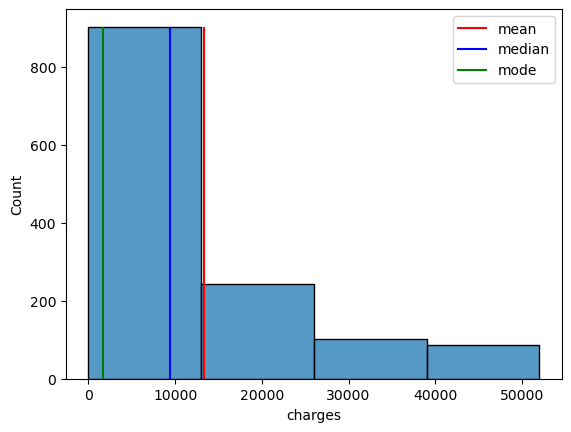

In [16]:
sns.histplot(x="charges",data=dataset,bins=[i for i in range(0,65000,13000)])
plt.plot([mn for i in range(0,900)],[i for i in range(0,900)],c="red",label="mean")
plt.plot([md for i in range(0,900)],[i for i in range(0,900)],c="blue",label="median")
plt.plot([mo for i in range(0,900)],[i for i in range(0,900)],c="green",label="mode")
plt.legend()
plt.show()

## 📉 Measures of Variability

We calculated the following measures of variability to understand the spread of medical charges:

- **Range**: Difference between the highest and lowest medical charges.
- **Standard Deviation**: Shows how much the values deviate from the mean. A higher standard deviation indicates a greater variation in charges.
- **Variance**: Square of standard deviation, reflecting data dispersion.

These measures give us insights into how varied the medical charges are across individuals.


In [17]:
min_r=dataset["charges"].min()
max_r=dataset["charges"].max()
min_r, max_r

(1121.8739, 63770.42801)

In [18]:
range=max_r-min_r
range

62648.554110000005

In [19]:
dataset["charges"].std()

12110.011236693994

In [26]:
dataset["charges"].var()


146652372.1528548

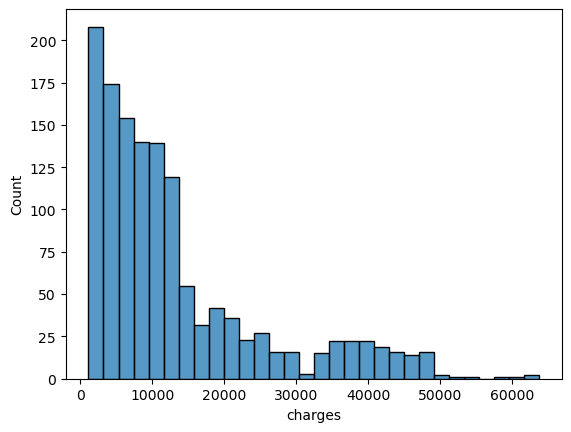

In [27]:
sns.histplot(x="charges",data=dataset)
plt.show()

In [32]:
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## 📊 Spread of Medical Charges

From the **describe()** function, we observe that the **50th percentile (median)**, **mean**, and **maximum values** of the **charges** column show significant spread. This suggests that the data has a high variability, and there are likely **outliers** influencing the results.


## 📊 Percentiles and Outlier Detection

We will use a **boxplot** to visually identify the **percentiles** and detect any **outliers** in the **charges** column.

A **boxplot** represents the spread of data and identifies **outliers** as points that fall outside the typical range of the 25th (Q1) and 75th (Q3) percentiles, usually beyond **1.5 times the Interquartile Range (IQR)**.

- **Q1 (25th percentile)**: The lower boundary of the box
- **Median (50th percentile)**: The line inside the box
- **Q3 (75th percentile)**: The upper boundary of the box
- **Outliers**: Points outside the "whiskers" of the boxplot, indicating extreme values

By plotting a boxplot, we can visually confirm the spread of the data and detect any potential **outliers** that may be skewing the results.


In [33]:
np.percentile(dataset["charges"],25)

4740.28715

In [34]:
np.percentile(dataset["charges"],50)

9382.033

In [35]:
np.percentile(dataset["charges"],75)

16639.912515

In [36]:
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


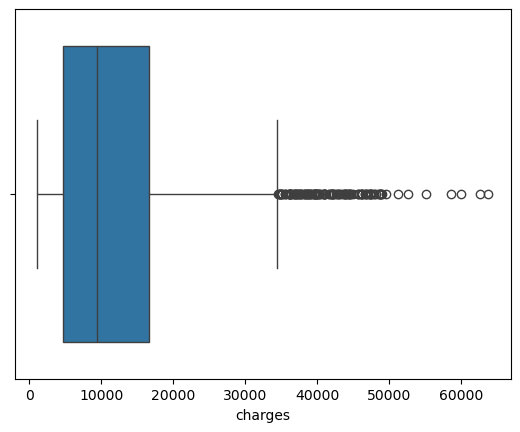

In [37]:
sns.boxplot(x="charges",data=dataset)
plt.show()

## 📐 Measures of Shape: Skewness

Skewness helps us understand the **asymmetry** of the data distribution:

- **Positive Skew (Right Skew)**: The tail on the right side is longer, and most of the data points are on the left.
- **Negative Skew (Left Skew)**: The tail on the left side is longer, and most of the data points are on the right.
- **No Skew (Symmetric)**: The data is evenly distributed around the mean, resembling a normal distribution.

We will calculate the **skewness** of the **charges** column to determine if the data is positively, negatively, or normally skewed.

A **skewness value**:
- **> 0** → Positive skew (Right Skew)
- **< 0** → Negative skew (Left Skew)
- **= 0** → No skew (Symmetric distribution)


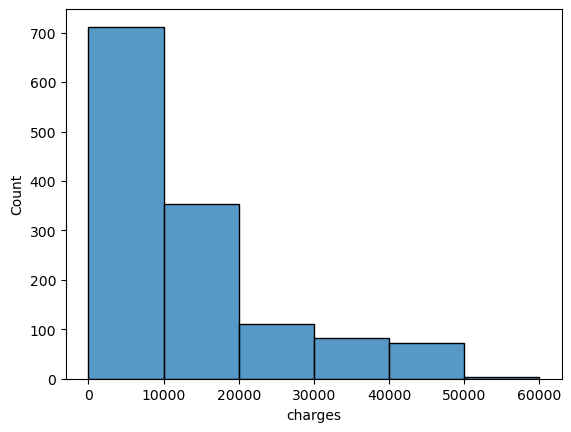

In [55]:
a=dataset["charges"].skew()
sns.histplot(x="charges",data=dataset,bins=[0,10000,20000,30000,40000,50000,60000])
plt.show()

## 📊 Covariance and Correlation (Visualized with Heatmap)

To better understand the relationship between variables like **charges**, **age**, **BMI**, etc., we can visualize their **covariance** and **correlation** using a **heatmap**. A heatmap provides a color-coded representation of these relationships.

- **Positive Correlation**: The values will be closer to **1** 
- **Negative Correlation**: The values will be closer to **-1** 
- **Low/No Correlation**: The values will be around **0** 

We can use a **heatmap** to clearly show which variables have strong positive or negative relationships, and which have weak or no correlation.


In [56]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [60]:
data_corr=dataset.select_dtypes(["int64","float64"]).corr()

In [62]:
data_corr

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


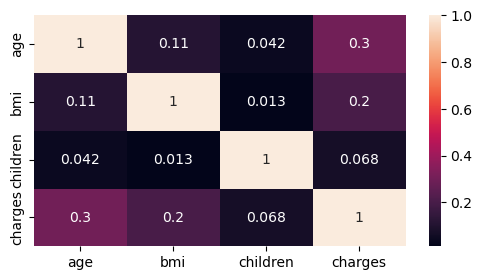

In [65]:
plt.figure(figsize=(6,3))
sns.heatmap(data_corr,annot=True)
plt.show()

## 🧪 Hypothesis Testing using Z-test

To test whether **smokers** have significantly higher medical charges than **non-smokers**, we use a **Z-test**.

- **Null Hypothesis (H₀)**: There is **no significant difference** in average charges between smokers and non-smokers.
- **Alternative Hypothesis (H₁)**: **Smokers have higher average charges** than non-smokers.

Based on the **Z-statistic** and **P-value**, we determine whether to reject the null hypothesis. A **p-value less than 0.05** indicates strong evidence **against the null hypothesis**, suggesting that smoking does significantly impact medical charges.


In [74]:
# Sample Mean: Charges of Smokers
sample_mean = dataset[dataset['smoker'] == 'yes']['charges'].mean()

# Population Mean: Charges of Non-Smokers
population_mean = dataset[dataset['smoker'] == 'no']['charges'].mean()

print("Sample Mean (Smokers):", sample_mean)
print("Population Mean (Non-Smokers):", population_mean)



Sample Mean (Smokers): 32050.23183153284
Population Mean (Non-Smokers): 8434.268297856204


In [75]:
# Population Standard Deviation (Non-Smokers)
population_std = dataset[dataset['smoker'] == 'no']['charges'].std()

print("Population Standard Deviation (Non-Smokers):", population_std)


Population Standard Deviation (Non-Smokers): 5993.781819194933


In [77]:
s_x=32050.23183153284
p_u=8434.268297856204
p_std=5993.781819194933
n=274
ap=0.05

In [78]:
z_cal=(s_x-p_u)/(p_std/np.sqrt(n))

In [79]:
z_cal

65.21988382690078

In [80]:
z_table=st.norm.ppf(1-ap)
z_table

1.6448536269514722

In [82]:
if z_cal>z_table:
    print("alternative hypothesis is right")
else:
    print("null hypothesis is right")

alternative hypothesis is right


### ✅ Z-Test Result and Conclusion

- **Z-calculated** = 65.2  
- **Z-critical (one-tailed, α = 0.05)** = 1.644  
- **Decision Rule**: If Z-calculated > Z-critical, reject the null hypothesis.

Since **65.2 > 1.644**, we **reject the null hypothesis**.

### 📌 Conclusion:
There is **strong statistical evidence** that the **average medical charges for smokers** are **significantly higher** than those for non-smokers. This suggests a clear impact of smoking on healthcare costs.


### Chi-Square Test: Smoker vs Region

To analyze whether there is any significant association between a person's smoking status and their region, we applied the Chi-Square Test of Independence.

Both `smoker` and `region` are categorical variables.

#### Hypotheses:
- **Null Hypothesis (H0):** There is no association between smoker status and region.
- **Alternative Hypothesis (H1):** There is an association between smoker status and region.

We used a contingency table and applied the `chi2_contingency` function from `scipy.stats`.

If the p-value is less than 0.05, we reject the null hypothesis, indicating a significant relationship.


In [5]:
import pandas as pd
from scipy.stats import chi2_contingency

# Dataset already loaded as 'dataset'

# Create contingency table
contingency_table = pd.crosstab(dataset['smoker'], dataset['region'])

# Perform Chi-Square Test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Display results
print("Chi-Square Statistic:", chi2_stat)
print("Degrees of Freedom:", dof)
print("P-value:", p_value)


Chi-Square Statistic: 7.34347776140707
Degrees of Freedom: 3
P-value: 0.06171954839170547


### Chi-Square Test Result: Smoker vs Region

- **Chi-Square Value:** 7.34  
- **Degrees of Freedom:** 3  
- **P-value:** 0.0617

#### Conclusion:
Since the p-value is **greater than 0.05**, we **do not reject the null hypothesis**.

This means that there is **no strong relationship** between a person’s **smoking status** and their **region**.  
In simple words, **smoking does not depend on the region** in this dataset.


    ### Conclusion:
This analysis used various statistical techniques such as descriptive statistics, hypothesis testing, and chi-square tests to understand the patterns and relationships in the insurance dataset. The results showed that smoking status does not depend on region, and there were significant differences in charges between smokers and non-smokers. This provides valuable insights into insurance charges and smoking behavior.
